<a href="https://colab.research.google.com/github/Victor-Hernandez-Vivanco/Proyecto_ML_Banco_Monopoly/blob/devop/Proyecto_ML_Banco_Monopoly.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

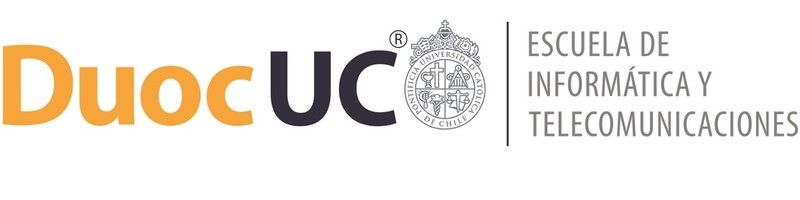

# Caso Banco **Monopoly**

**CONTEXTO CASO**



**Esta relacionado con Banco Monopoly**

 **Iniciamos montando el sistema de archivos de Google Drive en un entorno de Google Colab, lo cual te permite acceder a archivos almacenados en la cuenta de Google Drive y utilizarlos en el entorno de trabajo.**

In [1]:
from google.colab import files
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


 **Utilizamos la función read_csv de pandas para leer el archivo CSV que está en la ruta proporcionada. Este archivo contiene el conjunto de datos llamado "Base_clientes_Monopoly.csv" que está almacenado en el Google Drive.**

In [2]:
from sklearn.impute import KNNImputer
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer

data = pd.read_csv('/content/drive/MyDrive/Proyectos_ML/Banco_Monopoly/Base_clientes_Monopoly.csv', sep=';')


# **1. Exploratory Data Analysis (EDA)**

**Visualizamos las primeras 10 filas del data set para corroborar la carga del CSV**

In [3]:
data.head(20)

,Id,Subsegmento,Sexo,Region,Edad,Renta,Antiguedad,Internauta,Adicional,Dualidad,...,ColMx_T01,PagoNac_T01,PagoInt_T01,EeccNac_T01,EeccInt_T01,UsoL1_T01,UsoL2_T01,UsoLI_T01,IndRev_T01,target
0,1,160,M,13.0,43,NaN,130,1,1,0,...,0.00,33000,0.0,1099866.0,0.00,1099866.0,15080,0.00,R,0
1,2,160,H,13.0,46,143640.0,69,1,0,0,...,0.00,300000,0.0,214592.0,0.00,214592.0,83596,0.00,R,0
2,3,170,H,13.0,45,929106.0,24,1,1,0,...,0.00,216676,0.0,0.0,0.00,7400.0,0,0.00,T,0
3,4,151,H,13.0,46,172447.0,134,0,1,0,...,0.00,60000,0.0,272762.0,0.00,272762.0,10591,0.00,R,0
4,5,170,H,13.0,46,805250.0,116,0,1,1,...,0.00,272925,0.0,249562.0,0.00,75339.0,377782,0.00,R,0
5,6,170,H,13.0,47,707664.0,67,1,1,0,...,0.00,35800,0.0,35800.0,0.00,0.0,51197,0.00,R,0
6,7,811,H,13.0,48,1022833.0,21,1,0,1,...,0.00,9391,0.0,8818.0,0.00,8818.0,0,0.00,T,0
7,8,170,H,13.0,46,NaN,69,0,1,1,...,0.00,6000,0.0,283520.0,0.00,283520.0,0,0.00,R,0
8,9,170,H,13.0,49,1171066.0,33,0,0,0,...,0.00,60000,0.0,507629.0,0.00,507629.0,0,0.00,R,1
9,10,170,M,13.0,44,964387.0,23,1,1,0,...,0.00,92583,0.0,65487.0,0.00,65487.0,12084,0.00,R,0


**Seleccionamos un subconjunto de columnas relevantes del DataFrame original para continuar trabajando solo con los datos que son necesarios. Esto es muy útil para reducir el tamaño del dataset y enfocarse en las variables que realmente te interesan para el análisis. Luego creamos un nuevo DataFrame llamado new_data que contiene solo las columnas que están en la lista columnas_a_mantener. **

In [4]:

columnas_a_mantener = ["Id", "Subsegmento", "Sexo", "Region", "Edad", "Renta", "Antiguedad", "Adicional","Dualidad",
                       "Monoproducto", "Ctacte", "Consumo", "Hipotecario", "Cuentas",
                       "TC", "CUPO_L1", "CUPO_L2", "CUPO_MX", "FlgAct_T12", "FlgActCN_T12", "FlgActCI_T12", "FlgActAN_T12",
                       "FlgActAI_T12", "FlgActPAT_T12", "FlgActCCPC_T12", "FlgActCCOT_T12", "FlgActCOL_T12", "Fac_T12",
                       "Txs_T12", "FacCN_T12", "TxsCN_T12", "FacCI_T12", "FacAN_T12", "FacAI_T12",
                       "TxsAI_T12", "FacPAT_T12", "TxsPAT_T12", "FacCCPC_T12", "TxsCCPC_T12", "FacCCOT_T12", "TxsCCOT_T12",
                       "FacCOL_T12", "TxsCOL_T12", "FacDebCom_T12", "TxsDebCom_T12", "FacDebAtm_T12", "TxsDebAtm_T12",
                       "Col_T12", "ColL1T0_T12", "ColL1TE_T12", "ColL2T0_T12", "ColL2AC_T12", "ColL2CC_T12", "ColMx_T12",
                       "UsoL1_T12", "UsoL2_T12", "UsoLI_T12"]

new_data = data[columnas_a_mantener]




In [5]:
columnas = new_data.columns
print(columnas)
print(f"Cantidad total de columnas: {len(columnas)}")

Index(['Id', 'Subsegmento', 'Sexo', 'Region', 'Edad', 'Renta', 'Antiguedad',
       'Adicional', 'Dualidad', 'Monoproducto', 'Ctacte', 'Consumo',
       'Hipotecario', 'Cuentas', 'TC', 'CUPO_L1', 'CUPO_L2', 'CUPO_MX',
       'FlgAct_T12', 'FlgActCN_T12', 'FlgActCI_T12', 'FlgActAN_T12',
       'FlgActAI_T12', 'FlgActPAT_T12', 'FlgActCCPC_T12', 'FlgActCCOT_T12',
       'FlgActCOL_T12', 'Fac_T12', 'Txs_T12', 'FacCN_T12', 'TxsCN_T12',
       'FacCI_T12', 'FacAN_T12', 'FacAI_T12', 'TxsAI_T12', 'FacPAT_T12',
       'TxsPAT_T12', 'FacCCPC_T12', 'TxsCCPC_T12', 'FacCCOT_T12',
       'TxsCCOT_T12', 'FacCOL_T12', 'TxsCOL_T12', 'FacDebCom_T12',
       'TxsDebCom_T12', 'FacDebAtm_T12', 'TxsDebAtm_T12', 'Col_T12',
       'ColL1T0_T12', 'ColL1TE_T12', 'ColL2T0_T12', 'ColL2AC_T12',
       'ColL2CC_T12', 'ColMx_T12', 'UsoL1_T12', 'UsoL2_T12', 'UsoLI_T12'],
      dtype='object')
Cantidad total de columnas: 57


**Visualizamos las primeras filas del nuevo DataFrame que hemos creado, new_data, el cual contiene solo las columnas que seleccionamos en el paso anterior.**

In [6]:
new_data.head(20)

,Id,Subsegmento,Sexo,Region,Edad,Renta,Antiguedad,Adicional,Dualidad,Monoproducto,...,Col_T12,ColL1T0_T12,ColL1TE_T12,ColL2T0_T12,ColL2AC_T12,ColL2CC_T12,ColMx_T12,UsoL1_T12,UsoL2_T12,UsoLI_T12
0,1,160,M,13.0,43,NaN,130,1,0,0,...,675198.0,0.0,675198.0,0.0,0.0,0.0,0.0,731768.0,25890.0,0.0
1,2,160,H,13.0,46,143640.0,69,0,0,0,...,370529.0,10000.0,82504.0,278025.0,0.0,0.0,0.0,244876.0,284632.0,0.0
2,3,170,H,13.0,45,929106.0,24,1,0,0,...,123950.0,123950.0,0.0,0.0,0.0,0.0,0.0,94415.0,0.0,0.0
3,4,151,H,13.0,46,172447.0,134,1,0,1,...,343226.0,20000.0,315896.0,7330.0,0.0,0.0,0.0,358807.0,14660.0,0.0
4,5,170,H,13.0,46,805250.0,116,1,1,0,...,177973.0,55276.0,0.0,122697.0,0.0,0.0,0.0,67516.0,234211.0,0.0
5,6,170,H,13.0,47,707664.0,67,1,0,0,...,130390.0,0.0,0.0,82990.0,0.0,47400.0,0.0,0.0,165188.0,0.0
6,7,811,H,13.0,48,1022833.0,21,0,1,0,...,567296.0,214864.0,120079.0,111075.0,0.0,121278.0,0.0,393169.0,178385.0,0.0
7,8,170,H,13.0,46,NaN,69,1,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45270.0,0.0
8,9,170,H,13.0,49,1171066.0,33,0,0,0,...,472089.0,0.0,443880.0,7993.0,0.0,20216.0,0.0,480265.0,26191.0,0.0
9,10,170,M,13.0,44,964387.0,23,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**Generamos estadísticas descriptivas de las columnas numéricas del DataFrame new_data, proporcionándo una visión general de los datos. Esto es fundamental para entender mejor las distribuciones y detectar posibles valores atípicos o inconsistencias.**

In [7]:
new_data.describe()

,Id,Subsegmento,Region,Edad,Renta,Antiguedad,Adicional,Dualidad,Monoproducto,Ctacte,...,Col_T12,ColL1T0_T12,ColL1TE_T12,ColL2T0_T12,ColL2AC_T12,ColL2CC_T12,ColMx_T12,UsoL1_T12,UsoL2_T12,UsoLI_T12
count,51124.000000,51124.000000,51071.000000,51124.000000,3.775900e+04,51124.000000,51124.000000,51124.000000,51124.000000,51124.000000,...,4.287300e+04,4.287300e+04,4.287300e+04,4.287300e+04,4.287300e+04,4.287300e+04,4.287300e+04,4.287300e+04,4.287300e+04,42873.000000
mean,25562.500000,182.024274,10.828220,38.702879,6.630771e+05,38.896154,0.256181,0.381347,0.063141,0.925260,...,2.795826e+05,3.258308e+04,1.080360e+05,2.605590e+04,7.771296e+04,3.030334e+04,4.891269e+03,1.671249e+05,1.320438e+05,8.093227
std,14758.371918,29.276596,3.392703,13.302573,4.092795e+05,35.672549,0.436527,0.485722,0.243218,0.262974,...,5.558190e+05,7.704774e+04,2.715167e+05,6.763651e+04,4.529465e+05,1.018787e+05,4.526024e+04,3.034343e+05,4.613774e+05,88.744907
min,1.000000,151.000000,1.000000,9.000000,1.000000e+00,6.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-7.088177e+06,-1.500000e+01,-2940.000000
25%,12781.750000,160.000000,9.000000,28.000000,4.199990e+05,14.000000,0.000000,0.000000,0.000000,1.000000,...,2.124200e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.990000e+03,0.000000e+00,0.000000
50%,25562.500000,170.000000,13.000000,35.000000,5.670120e+05,25.000000,0.000000,0.000000,0.000000,1.000000,...,9.700600e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.504200e+04,1.419100e+04,0.000000
75%,38343.250000,210.000000,13.000000,46.000000,8.149035e+05,54.000000,1.000000,1.000000,0.000000,1.000000,...,2.963760e+05,3.304800e+04,7.311000e+04,2.616700e+04,0.000000e+00,1.757100e+04,0.000000e+00,1.978870e+05,7.896000e+04,0.000000
max,51124.000000,959.000000,13.000000,104.000000,1.308933e+07,324.000000,1.000000,1.000000,1.000000,1.000000,...,1.220253e+07,2.682426e+06,5.461921e+06,2.096523e+06,1.214539e+07,8.018612e+06,2.038296e+06,5.647564e+06,1.198188e+07,3778.750000


**El método info() de pandas nos proporciona un resumen conciso sobre el DataFrame, incluyendo el tipo de datos de cada columna con lo que podemos diferenciar las columnas nuymericas de las categoricas y la cantidad de valores no nulos. Es un paso crucial para entender la estructura del DataFrame y detectar posibles problemas con los tipos de datos o valores faltantes ya que al observar nos damos cuenta que hay valores faltantes que pueden ser NaN o Nulos.**

In [8]:
new_data.info()
print(f"Cantidad total de columnas: {len(columnas)}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51124 entries, 0 to 51123
Data columns (total 57 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              51124 non-null  int64  
 1   Subsegmento     51124 non-null  int64  
 2   Sexo            51123 non-null  object 
 3   Region          51071 non-null  float64
 4   Edad            51124 non-null  int64  
 5   Renta           37759 non-null  float64
 6   Antiguedad      51124 non-null  int64  
 7   Adicional       51124 non-null  int64  
 8   Dualidad        51124 non-null  int64  
 9   Monoproducto    51124 non-null  int64  
 10  Ctacte          51124 non-null  int64  
 11  Consumo         51124 non-null  int64  
 12  Hipotecario     51124 non-null  int64  
 13  Cuentas         51124 non-null  int64  
 14  TC              51124 non-null  int64  
 15  CUPO_L1         51124 non-null  int64  
 16  CUPO_L2         51124 non-null  float64
 17  CUPO_MX         51124 non-null 

# **Detección de valores Nulos**

In [9]:
new_data.isnull().sum()

,0
Id,0
Subsegmento,0
Sexo,1
Region,53
Edad,0
Renta,13365
Antiguedad,0
Adicional,0
Dualidad,0
Monoproducto,0


# **Tratamiento de NULL**

## **Paso 1: Separar las columnas numéricas y categóricas**


In [10]:

# Columnas numéricas
numericas = new_data.select_dtypes(include=['float64', 'int64']).columns

# Columnas categóricas
categoricas = new_data.select_dtypes(include=['object']).columns

# Cantidades de columnas
cantidad_numericas = len(numericas)
cantidad_categoricas = len(categoricas)

print(f'Cantidad de columnas numéricas: {cantidad_numericas}')
print(f'Cantidad de columnas categóricas: {cantidad_categoricas}')


Cantidad de columnas numéricas: 56
Cantidad de columnas categóricas: 1


## **Imputacion con la Media para la Columna Categorica**

### **Primero traemos las variables Categoricas del Data Frame**

In [11]:
# Obtener las variables categóricas
variables_categoricas = new_data.select_dtypes(include=['object']).columns

# Mostrar las variables categóricas
print("Variables categóricas en el DataFrame:")
print(variables_categoricas)

Variables categóricas en el DataFrame:
Index(['Sexo'], dtype='object')


### **Verificamos los valores Unicos de la Variable Categorica Sexo**

In [12]:
# Verificar valores únicos en la columna 'Sexo'
print(new_data['Sexo'].unique())

['M' 'H' nan]


### **Revisamos la cantidad de valores NULL en la variable Sexo**

In [13]:
# Verificar valores nulos en la columna 'Sexo'
nulos_sexo = new_data['Sexo'].isnull().sum()
print(f"Número de valores nulos en 'Sexo': {nulos_sexo}")

Número de valores nulos en 'Sexo': 1


# **Imputar valores nulos en 'Sexo' usando la moda de forma segura**

In [14]:
moda_sexo = new_data['Sexo'].mode()[0]  # Obtiene la moda
new_data.loc[:, 'Sexo'] = new_data['Sexo'].fillna(moda_sexo)

**Comprobamos si resultó imputar con la moda la variable Sexo**

In [15]:
nulos_sexo_post_imputacion = new_data['Sexo'].isnull().sum()
print(f"Número de valores nulos en 'Sexo' después de la imputación: {nulos_sexo_post_imputacion}")

Número de valores nulos en 'Sexo' después de la imputación: 0


# Revisamos el head(20)

In [16]:
new_data.head(20)

,Id,Subsegmento,Sexo,Region,Edad,Renta,Antiguedad,Adicional,Dualidad,Monoproducto,...,Col_T12,ColL1T0_T12,ColL1TE_T12,ColL2T0_T12,ColL2AC_T12,ColL2CC_T12,ColMx_T12,UsoL1_T12,UsoL2_T12,UsoLI_T12
0,1,160,M,13.0,43,NaN,130,1,0,0,...,675198.0,0.0,675198.0,0.0,0.0,0.0,0.0,731768.0,25890.0,0.0
1,2,160,H,13.0,46,143640.0,69,0,0,0,...,370529.0,10000.0,82504.0,278025.0,0.0,0.0,0.0,244876.0,284632.0,0.0
2,3,170,H,13.0,45,929106.0,24,1,0,0,...,123950.0,123950.0,0.0,0.0,0.0,0.0,0.0,94415.0,0.0,0.0
3,4,151,H,13.0,46,172447.0,134,1,0,1,...,343226.0,20000.0,315896.0,7330.0,0.0,0.0,0.0,358807.0,14660.0,0.0
4,5,170,H,13.0,46,805250.0,116,1,1,0,...,177973.0,55276.0,0.0,122697.0,0.0,0.0,0.0,67516.0,234211.0,0.0
5,6,170,H,13.0,47,707664.0,67,1,0,0,...,130390.0,0.0,0.0,82990.0,0.0,47400.0,0.0,0.0,165188.0,0.0
6,7,811,H,13.0,48,1022833.0,21,0,1,0,...,567296.0,214864.0,120079.0,111075.0,0.0,121278.0,0.0,393169.0,178385.0,0.0
7,8,170,H,13.0,46,NaN,69,1,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45270.0,0.0
8,9,170,H,13.0,49,1171066.0,33,0,0,0,...,472089.0,0.0,443880.0,7993.0,0.0,20216.0,0.0,480265.0,26191.0,0.0
9,10,170,M,13.0,44,964387.0,23,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# **Traemos todas las varibles númericas para visualizar los NULL**

In [17]:
from sklearn.impute import KNNImputer
# Seleccionar las columnas numéricas que contienen valores nulos
numericas = new_data.select_dtypes(include=['float64', 'int64']).columns
print("Columnas numéricas con nulos:\n", new_data[numericas].isnull().sum())

Columnas numéricas con nulos:
 Id                    0
Subsegmento           0
Region               53
Edad                  0
Renta             13365
Antiguedad            0
Adicional             0
Dualidad              0
Monoproducto          0
Ctacte                0
Consumo               0
Hipotecario           0
Cuentas               0
TC                    0
CUPO_L1               0
CUPO_L2               0
CUPO_MX               0
FlgAct_T12         8251
FlgActCN_T12       8251
FlgActCI_T12       8251
FlgActAN_T12       8251
FlgActAI_T12       8251
FlgActPAT_T12      8251
FlgActCCPC_T12     8251
FlgActCCOT_T12     8251
FlgActCOL_T12      8251
Fac_T12            8251
Txs_T12            8251
FacCN_T12          8251
TxsCN_T12          8251
FacCI_T12          8251
FacAN_T12          8251
FacAI_T12          8251
TxsAI_T12          8251
FacPAT_T12         8251
TxsPAT_T12         8251
FacCCPC_T12        8251
TxsCCPC_T12        8251
FacCCOT_T12        8251
TxsCCOT_T12        8251
FacCOL_T1

 **Imputación con KNN para columnas numéricas
Usaremos el método KNNImputer de sklearn para imputar los valores numéricos NaN.**

In [ ]:
# Importar las bibliotecas necesarias
import pandas as pd
from sklearn.impute import KNNImputer

# ... (código para cargar el DataFrame new_data)

# Columnas numéricas
numericas = new_data.select_dtypes(include=['float64', 'int64']).columns

# Inicializar el imputador KNN
imputador_knn = KNNImputer(n_neighbors=3)

# Crear una copia para la imputación numérica
new_data_num = new_data[numericas].copy()

# Imputar los valores numéricos en la copia
new_data_num = pd.DataFrame(imputador_knn.fit_transform(new_data_num), columns=numericas, index=new_data.index)

# Actualizar el DataFrame original con los valores imputados
new_data.update(new_data_num)

# Mostrar una muestra antes de la imputación categórica
print("Antes de la imputación categórica:")
print(new_data.head())

# Imputar valores categóricos con la moda (si es necesario)
categoricas = new_data.select_dtypes(include=['object']).columns
for columna in categoricas:
    moda = new_data[columna].mode()[0]
    new_data[columna].fillna(moda, inplace=True)  # inplace=True modifica el DataFrame original


head

# **Revisamos los datos con las primeras 20 filas**

In [ ]:
new_data.head()

## **Corroboramos que no existan valores Nulos depues de las Imputaciones**

In [ ]:
new_data.isnull().sum()

# **Verificar y Corregir Duplicados**

In [ ]:
# Calcular y mostrar el número de filas duplicadas en new_data
duplicados = new_data.duplicated().sum()
print(f"El número de filas duplicadas es: {duplicados}")

## **GENERAR ENCODE PARA LA VARIABLE CATEGORICAS Y TRANSFORMARLAS A NUMERICAS**

# **Transformar Datos**

**Normalización/Estandarización**

In [ ]:
from sklearn.preprocessing import StandardScaler

# Inicializar el StandardScaler
scaler = StandardScaler()

# Aplicar la transformación utilizando .loc para evitar el SettingWithCopyWarning
new_data.loc[:, numericas] = scaler.fit_transform(new_data[numericas])



In [ ]:
new_data[numericas].head()